In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import seaborn as sns


import time
import requests
import json
import re

# Gathering data

## 1.Twitter Archive Enhanced 

In [2]:
df_archive = pd.read_csv('./twitter-archive-enhanced.csv')
df_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [3]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [4]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

## 2. Image Prediction

In [5]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)
with open('./image-predictions.tsv', 'wb') as file:
    file.write(response.content)
    
df_image = pd.read_csv('./image-predictions.tsv', sep='\t')

In [6]:
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
df_image.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [8]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## 3. Twitter API

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

#Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
#These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

#NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
#df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
#change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
#NOTE TO REVIEWER: this student had mobile verification issues so the following
#Twitter API code was sent to this student from a Udacity instructor
#Tweet IDs for which to gather additional data via Twitter's API

tweet_ids = df_1.tweet_id.values
len(tweet_ids)

#Query Twitter's API for JSON data for each tweet ID in the Twitter archive

count = 0
fails_dict = {}
start = timer()

#Save each tweet's returned JSON as a new line in a .txt file

with open('tweet_json.txt', 'w') as outfile:

    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
            
end = timer()
print(end - start)
print(fails_dict)


In [9]:
df_list = []

with open ('tweet-json.txt' , 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        df_list.append({'tweet_id': tweet_id, 'retweet_count': retweet_count, 'favorite_count': fav_count})
        
df_api = pd.DataFrame(df_list)

In [10]:
df_api.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [11]:
df_api.tail()

,tweet_id,retweet_count,favorite_count
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


In [12]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


## Assessing Data

## 1.Twitter Archive Enhanced 

In [13]:
df_archive.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
912,757596066325864448,NaN,NaN,2016-07-25 15:19:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's another picture without a dog in it. Id...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/757596066...,4,10,None,None,None,None,None
1296,707969809498152960,NaN,NaN,2016-03-10 16:42:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Rufus. He's a Honeysuckle Firefox. Curly ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707969809...,11,10,Rufus,None,None,None,None
1824,676496375194980353,NaN,NaN,2015-12-14 20:17:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Griffin. He's upset because his c...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676496375...,9,10,Griffin,None,None,None,None


In [14]:
df_archive[df_archive.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [15]:
df_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [16]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [17]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [18]:
df_archive.name.value_counts()

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
          ... 
Kallie       1
Mabel        1
Nida         1
Gòrdón       1
Sandra       1
Name: name, Length: 957, dtype: int64

In [19]:
filt_1 = (df_archive['name'].apply(len) <= 2)
df_archive[filt_1]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
393,825876512159186944,NaN,NaN,2017-01-30 01:21:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mo. No one will push him around in the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825876512...,11,10,Mo,None,None,None,None
446,819015337530290176,NaN,NaN,2017-01-11 02:57:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He was a very good ...,8.190048e+17,4.196984e+09,2017-01-11 02:15:36 +0000,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
449,819004803107983360,NaN,NaN,2017-01-11 02:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He was a very good First Doggo. 14...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
553,804026241225523202,NaN,NaN,2016-11-30 18:16:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's going to make me cry. 13/10 p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/804026241...,13,10,Bo,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None


In [20]:
df_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

In [21]:
df_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

## 2. Image Prediction 

In [22]:
df_image.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1864,842892208864923648,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
189,669375718304980992,https://pbs.twimg.com/media/CUoZqaqWcAAA2MQ.jpg,1,Airedale,0.168762,True,Norfolk_terrier,0.107479,True,Lakeland_terrier,0.097846,True
1916,854482394044301312,https://pbs.twimg.com/media/C9u7MtmV0AA741s.jpg,1,Chihuahua,0.260242,True,toy_poodle,0.189158,True,Labrador_retriever,0.144195,True
887,699072405256409088,https://pbs.twimg.com/ext_tw_video_thumb/69907...,1,Shih-Tzu,0.599587,True,Pekinese,0.213069,True,Maltese_dog,0.154293,True
1227,745314880350101504,https://pbs.twimg.com/media/Clfj6RYWMAAFAOW.jpg,2,ice_bear,0.807762,False,great_white_shark,0.027040,False,fountain,0.022052,False
1142,729854734790754305,https://pbs.twimg.com/media/CiD3AfkXEAA3S_r.jpg,1,doormat,0.359586,False,china_cabinet,0.053901,False,passenger_car,0.052665,False
184,669354382627049472,https://pbs.twimg.com/media/CUoGQjdXAAAkaz2.jpg,1,Chihuahua,0.973990,True,French_bulldog,0.010832,True,Pekinese,0.002099,True
1618,802572683846291456,https://pbs.twimg.com/media/CyNPmJgXcAECPuB.jpg,1,golden_retriever,0.610171,True,Labrador_retriever,0.173252,True,cocker_spaniel,0.163257,True
1298,752334515931054080,https://pbs.twimg.com/ext_tw_video_thumb/75233...,1,Bedlington_terrier,0.399163,True,standard_poodle,0.086425,True,wire-haired_fox_terrier,0.075231,True
648,681694085539872773,https://pbs.twimg.com/media/CXXdJ7CVAAALu23.jpg,1,toy_poodle,0.920992,True,miniature_poodle,0.060857,True,Maltese_dog,0.006064,True


In [23]:
df_image[df_image.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [24]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


## 3.Twitter API 

In [26]:
df_api.sample(10)

,tweet_id,retweet_count,favorite_count
654,791784077045166082,11271,0
921,755955933503782912,3285,8092
586,799757965289017345,2506,9390
2219,668480044826800133,162,491
1996,672538107540070400,404,1089
999,747933425676525569,2894,7310
295,837366284874571778,6005,23074
1489,692894228850999298,910,2511
445,819015337530290176,42228,0
920,756275833623502848,1738,7114


In [27]:
df_api[df_api.tweet_id.duplicated()]

,tweet_id,retweet_count,favorite_count


In [28]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


## Quality Issues (Dirty Data)

**df_archive**

    Compleetness
        Missing data in name, dog_stage (doggo, floofer, pupper, puppo) columns.
        Tweets with no images (discrepancy in number of tweets between df_archive and df_image_predictions).
        Some tweets are actually retweets and replies.
        
    Validity
        Some rating_denominator column values ( != 10 ).
        
    Accuarcy
        The rating_numerator ( > 20) columns have inaccurate values.
        Incorrect names or missing names in name column such as, a, an, the... - all are written with lower case letters.


    Consistency
        Inconsistent datatypes for the (tweet_id, timestamp, ...) columns.
        In several columns null objects are non-null (None to NaN).


**df_image**

    Accuarcy
        Irrepresentive names for columns (p --> probability, conf --> confidence_level).

      
    Consistency
        Inconsistent datatypes for the (tweet_id, img_num , ...) columns.
    


**df_api**

    Consistency
        Inconsistent datatype for the tweet_id column.
        


In [29]:
all_columns = pd.Series(list(df_archive) + list(df_image) + list(df_api))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

## Tidiness Issues (structural) (Messy Data)

df_archive should be joined to df_api

**df_archive**

    column headers are values not variable names:
        dog_stage (doggo, floofer, pupper, puppo) columns should be merged

**df_image**

    column headers are values not variable names:
        p1, p2 and p3 should be merged 
        p1_conf, p2_conf and p3_conf columns should be merged 
        p1_dog, p2_dog and p3_dog columns should be merged


## Cleaning

In [30]:
df_archive_clean = df_archive.copy()
df_image_clean = df_image.copy()
df_api_clean = df_api.copy()

#### Define

1- Resolve the biggest structural issue i.e. merging df_archive and df_api into one table.
  #(same tweet_id datatype is necessary before merging tables)

#### Code

In [31]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [32]:
df_api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [33]:
#df_archive_clean = pd.merge(left=df_archive_clean, right=df_api_clean, 
#                            left_on='tweet_id', right_on='tweet_id', 
#                            how='inner')
df_archive_clean = pd.merge(left=df_archive_clean, right=df_api_clean, how='left', on='tweet_id')

#### Test

In [34]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [35]:
df_archive_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,8853.0,39467.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,6514.0,33819.0


#### Define

2- merging (doggo, floofer, pupper, puppo) columns 


#### Code

In [36]:
#df_archive_clean = df_archive_clean.replace(to_replace = 'None', value = '')

df_archive_clean.doggo = df_archive_clean.doggo.str.replace('None' ,'')
df_archive_clean.floofer = df_archive_clean.floofer.str.replace('None' ,'')
df_archive_clean.pupper = df_archive_clean.pupper.str.replace('None' ,'')
df_archive_clean.puppo = df_archive_clean.puppo.str.replace('None' ,'')



In [37]:
df_archive_clean['dog_stage'] = df_archive_clean['doggo'] + df_archive_clean['floofer'] + df_archive_clean['pupper'] + df_archive_clean['puppo']

In [38]:
#drop columns
df_archive_clean = df_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1) 

#### Test

In [39]:
df_archive_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,8853.0,39467.0,


In [40]:
df_archive_clean.dog_stage.value_counts()

                1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [41]:
df_archive_clean.loc[df_archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo-pupper'
df_archive_clean.loc[df_archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo-floofer'
df_archive_clean.loc[df_archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo-puppo'

In [42]:
df_archive_clean.dog_stage.value_counts()

                 1976
pupper            245
doggo              83
puppo              29
doggo-pupper       12
floofer             9
doggo-floofer       1
doggo-puppo         1
Name: dog_stage, dtype: int64

In [43]:
df_archive_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,8853.0,39467.0,


In [44]:
df_archive_clean.replace('', np.nan)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,8853.0,39467.0,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,6514.0,33819.0,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,4328.0,25461.0,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,8964.0,42908.0,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,9774.0,41048.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,41.0,111.0,NaN
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,147.0,311.0,NaN
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,47.0,128.0,NaN
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,48.0,132.0,NaN


In [45]:
df_archive_clean.dog_stage.value_counts()

                 1976
pupper            245
doggo              83
puppo              29
doggo-pupper       12
floofer             9
doggo-floofer       1
doggo-puppo         1
Name: dog_stage, dtype: int64

#### Define

3- merging (p1, p2, p3) (p1_conf, p2_conf, p3_conf) and (p1_dog, p2_dog, p3_dog) columns.

### Code

In [46]:
# Renaming the dataset columns
#['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']

cols = ['tweet_id', 'jpg_url', 'img_num', 
       'prediction_1', 'confidence_1', 'breed_1',
       'prediction_2', 'confidence_2', 'breed_2',
       'prediction_3', 'confidence_3', 'breed_3']

df_image_clean.columns = cols

In [47]:
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tweet_id      2075 non-null   int64  
 1   jpg_url       2075 non-null   object 
 2   img_num       2075 non-null   int64  
 3   prediction_1  2075 non-null   object 
 4   confidence_1  2075 non-null   float64
 5   breed_1       2075 non-null   bool   
 6   prediction_2  2075 non-null   object 
 7   confidence_2  2075 non-null   float64
 8   breed_2       2075 non-null   bool   
 9   prediction_3  2075 non-null   object 
 10  confidence_3  2075 non-null   float64
 11  breed_3       2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [48]:
df_image_clean.head(5)

,tweet_id,jpg_url,img_num,prediction_1,confidence_1,breed_1,prediction_2,confidence_2,breed_2,prediction_3,confidence_3,breed_3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [49]:
#pandas.wide_to_long(df, stubnames, i, j, sep='', suffix='\\d+')

#i str or list-like
#Column(s) to use as id variable(s).

#j str
#The name of the sub-observation variable. What you wish to name your suffix in the long format.
#Returns A DataFrame that contains each stub name as a variable, with new index (i, j).

In [50]:
# Reshaping the dataframe
df_image_clean = pd.wide_to_long(df_image_clean, stubnames=['prediction', 'confidence', 'breed'], 
    i=['tweet_id', 'jpg_url', 'img_num'], j='prediction_level', sep="_").reset_index() 


### Test

In [51]:
df_image_clean.head(5)

,tweet_id,jpg_url,img_num,prediction_level,prediction,confidence,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,collie,0.156665,True
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,Shetland_sheepdog,0.061428,True
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
4,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,miniature_pinscher,0.074192,True


In [52]:
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6225 entries, 0 to 6224
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          6225 non-null   int64  
 1   jpg_url           6225 non-null   object 
 2   img_num           6225 non-null   int64  
 3   prediction_level  6225 non-null   int64  
 4   prediction        6225 non-null   object 
 5   confidence        6225 non-null   float64
 6   breed             6225 non-null   bool   
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 298.0+ KB


#### Define

4- removing retweets, replies and tweets without images.

#### Code

In [53]:
# Use the image_prediction table to guide the selection and removal of tweets without photos in the archive table
# creating a list of tweet_ids with images "tweets_with_image" and confirming its length
tweets_with_image = list(df_image_clean.tweet_id.unique())

In [54]:
# confirming that all the tweets with images exist in the archive dataset
len(tweets_with_image) == df_archive_clean.tweet_id.isin(tweets_with_image).sum()

True

In [55]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  retweet_count               2354 

In [56]:
# Cleaning in action ;)
df_archive_clean = df_archive_clean[df_archive_clean.tweet_id.isin(tweets_with_image)]

In [57]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2075 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2075 non-null   object 
 4   source                      2075 non-null   object 
 5   text                        2075 non-null   object 
 6   retweeted_status_id         81 non-null     float64
 7   retweeted_status_user_id    81 non-null     float64
 8   retweeted_status_timestamp  81 non-null     object 
 9   expanded_urls               2075 non-null   object 
 10  rating_numerator            2075 non-null   int64  
 11  rating_denominator          2075 non-null   int64  
 12  name                        2075 non-null   object 
 13  retweet_count               2073 

In [58]:
#In the follwing part, the following redundant columns (in_reply_to_status_id, in_reply_to_user_id, 'retweeted_status_id', 
#                                                      'retweeted_status_user_id', 'retweeted_status_timestamp') 
#will be utilized to shed the retweet and replies from our datasets and then will be dropped.

# Throwback to the archive dataset to extract the tweets that include data in the retweet_status_id.
retweet_entries = df_archive_clean.retweeted_status_id.notnull()
df_archive_clean[retweet_entries].shape[0]

# Dropping the retweets from the archive data set
df_archive_clean = df_archive_clean[~retweet_entries]

# Extracting replies entries with the same method as the retweets
reply_entries = df_archive_clean.in_reply_to_status_id.notnull()
df_archive_clean[reply_entries].shape[0]

# Dropping the replies from the archive data set
df_archive_clean = df_archive_clean[~reply_entries]

# Now we check the image_prediction table for extra tweet ids not in the archive table
np.logical_not(df_image_clean.tweet_id.isin(list(df_archive_clean.tweet_id)))

# Dropping the retweets and replies ids from the image prediction dataframe
df_image_clean = df_image_clean[~np.logical_not(df_image_clean.tweet_id.isin(list(df_archive_clean.tweet_id)))]


In [59]:
#drop columns
df_archive_clean = df_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 
                                          'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1) 

#### Test

In [60]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1971 non-null   int64  
 1   timestamp           1971 non-null   object 
 2   source              1971 non-null   object 
 3   text                1971 non-null   object 
 4   expanded_urls       1971 non-null   object 
 5   rating_numerator    1971 non-null   int64  
 6   rating_denominator  1971 non-null   int64  
 7   name                1971 non-null   object 
 8   retweet_count       1971 non-null   float64
 9   favorite_count      1971 non-null   float64
 10  dog_stage           1971 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 184.8+ KB


In [61]:
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5913 entries, 0 to 6224
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          5913 non-null   int64  
 1   jpg_url           5913 non-null   object 
 2   img_num           5913 non-null   int64  
 3   prediction_level  5913 non-null   int64  
 4   prediction        5913 non-null   object 
 5   confidence        5913 non-null   float64
 6   breed             5913 non-null   bool   
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 329.1+ KB


In [62]:
df_archive_clean.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stage
1784,677662372920729601,2015-12-18 01:31:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",In honor of the new Star Wars movie. Here's Yo...,https://twitter.com/dog_rates/status/677662372...,12,10,None,1101.0,2134.0,
980,749774190421639168,2016-07-04 01:17:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lucy. She's a Benebop Cumberplop. 12/1...,https://twitter.com/dog_rates/status/749774190...,12,10,Lucy,1493.0,5114.0,
1708,680798457301471234,2015-12-26 17:12:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Moofasa. He must be a powerful do...,https://twitter.com/dog_rates/status/680798457...,6,10,Moofasa,1182.0,3134.0,


#### Define

5- Fixing the rating_numerator and rating_denominator columns 

#### Code

In [63]:
df_archive_clean.rating_denominator.value_counts()

10     1954
50        3
11        2
80        2
2         1
7         1
20        1
40        1
70        1
90        1
110       1
120       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [64]:
df_archive_clean[df_archive_clean['rating_numerator'] < 6].rating_numerator.value_counts()

5    33
3    19
4    16
2     9
1     5
0     1
Name: rating_numerator, dtype: int64

In [65]:
df_archive_clean[df_archive_clean['rating_numerator'] > 15].rating_numerator.value_counts()

88      1
99      1
27      1
26      1
121     1
24      1
84      1
50      1
44      1
1776    1
45      1
204     1
75      1
144     1
80      1
165     1
420     1
60      1
Name: rating_numerator, dtype: int64

In [66]:
#extracting the decimal ratings with regular expressions
df_archive_clean[df_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/Users/mahmoudnagy/opt/anaconda3/lib/python3.8/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5
695,"This is Logan, the Chow who lived. He solemnly...",75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27
1712,Here we have uncovered an entire battalion of ...,26


In [67]:
df_archive_clean[df_archive_clean['rating_denominator'] != 10][['text', 'rating_denominator']]

,text,rating_denominator
433,The floofs have been released I repeat the flo...,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,7
902,Why does this never happen at my front door......,150
1068,"After so many requests, this is Bretagne. She ...",11
1120,Say hello to this unbelievably well behaved sq...,170
1165,Happy 4/20 from the squad! 13/10 for all https...,20
1202,This is Bluebert. He just saw that both #Final...,50
1228,Happy Saturday here's 9 puppers on a bench. 99...,90
1254,Here's a brigade of puppers. All look very pre...,80
1274,"From left to right:\nCletus, Jerome, Alejandro...",50


In [68]:
pd.set_option('display.max_colwidth', -1)

<ipython-input-68-0891b765a168>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [69]:
#df_archive_clean[df_archive_clean['rating_numerator'] < 6].text
df_archive_clean[df_archive_clean['rating_numerator'] < 6][['text', 'rating_numerator']]

,text,rating_numerator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5
315,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0
730,Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC,5
765,This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M,3
883,This is Fido. He can tell the weather. Not good at fetch tho. Never comes when called. 4/10 would probably still pet https://t.co/4gOv2Q3iKP,4
...,...,...
2334,This is a funny dog. Weird toes. Won't come down. Loves branch. Refuses to eat his food. Hard to cuddle with. 3/10 https://t.co/IIXis0zta0,3
2335,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,1
2338,Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/Asgdc6kuLX,1
2349,This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,2


In [70]:
df_archive_clean[df_archive_clean['rating_numerator'] > 15][['text', 'rating_numerator']]

,text,rating_numerator
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165
979,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99
1254,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80


In [71]:
# Calculating the dogs counts in the tweets featuring many dogs
dogs_count = df_archive_clean.rating_denominator[df_archive_clean['rating_numerator'] >= 40 ]/10

# Check the dog_count with their indices:
print(dogs_count)

# Performing the Calculations

df_archive_clean.loc[df_archive_clean.rating_numerator >= 40, ['rating_numerator', 'rating_denominator']] = [df_archive_clean.rating_numerator[df_archive_clean.rating_numerator >= 40]/dogs_count , 10]

433     7.0 
695     1.0 
902     15.0
979     1.0 
1120    17.0
1202    5.0 
1228    9.0 
1254    8.0 
1274    5.0 
1351    5.0 
1433    4.0 
1635    11.0
1779    12.0
1843    8.0 
2074    1.0 
Name: rating_denominator, dtype: float64


/Users/mahmoudnagy/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


#### Test

In [72]:
df_archive_clean.rating_denominator.value_counts()

10    1966
11    2   
2     1   
7     1   
20    1   
Name: rating_denominator, dtype: int64

In [73]:
df_archive_clean[df_archive_clean['rating_denominator'] != 10][['text', 'rating_denominator']]

,text,rating_denominator
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,7
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",11
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,20
1662,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,11
2335,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,2


In [74]:
df_archive_clean[df_archive_clean['rating_numerator'] > 15].rating_numerator.value_counts()

27.0      1
1776.0    1
75.0      1
26.0      1
24.0      1
420.0     1
Name: rating_numerator, dtype: int64

In [75]:
df_archive_clean[df_archive_clean['rating_numerator'] > 15][['text', 'rating_numerator']]

,text,rating_numerator
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24.0
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75.0
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27.0
979,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776.0
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26.0
2074,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,420.0


#### Define

6- correcting datatypes

#### Code

In [76]:
#df_archive_clean
df_archive_clean['tweet_id'] = df_archive_clean['tweet_id'].astype(str)
df_archive_clean['timestamp'] = pd.to_datetime(df_archive_clean.timestamp)
df_archive_clean['source'] = df_archive_clean['source'].astype('category')
df_archive_clean['rating_numerator'] = df_archive_clean['rating_numerator'].astype('float')
df_archive_clean['rating_denominator'] = df_archive_clean['rating_denominator'].astype('float')
df_archive_clean['dog_stage'] = df_archive_clean['dog_stage'].astype('category')

#df_image_clean
df_image_clean['tweet_id'] = df_image_clean['tweet_id'].astype(str)

#### Test

In [77]:
df_archive_clean.dtypes

tweet_id              object             
timestamp             datetime64[ns, UTC]
source                category           
text                  object             
expanded_urls         object             
rating_numerator      float64            
rating_denominator    float64            
name                  object             
retweet_count         float64            
favorite_count        float64            
dog_stage             category           
dtype: object

In [78]:
df_image_clean.dtypes

tweet_id            object 
jpg_url             object 
img_num             int64  
prediction_level    int64  
prediction          object 
confidence          float64
breed               bool   
dtype: object

In [79]:
df_api_clean.dtypes

tweet_id          int64
retweet_count     int64
favorite_count    int64
dtype: object

#### Define

7- Fixing the name column

#### Code

In [80]:
pd.set_option('display.max_rows', None)

In [81]:
df_archive_clean[df_archive_clean['name'].apply(len) < 3].name.value_counts()

a     55
an    6 
Bo    6 
JD    1 
Jo    1 
O     1 
Al    1 
Mo    1 
by    1 
my    1 
Ed    1 
Name: name, dtype: int64

In [82]:
pattern = re.compile(r'(?:name(?:d)?)\s{1}(?:is\s)?([A-Za-z]+)')
for index, row in df_archive_clean.iterrows():  
    if row['name'][0].islower() or row['name'] == 'None':
        try:
            c_name = re.findall(pattern, row['text'])[0]
            df_archive_clean.loc[index,'name'] = df_archive_clean.loc[index,'name'].replace(row['name'], c_name)

        except IndexError:
            df_archive_clean.loc[index,'name'] = np.nan


#### Test

In [83]:
df_archive_clean.name.value_counts(dropna = False)

NaN               592
Charlie           11 
Lucy              10 
Oliver            10 
Cooper            10 
Penny             9  
Tucker            9  
Winston           8  
Sadie             8  
Toby              7  
Lola              7  
Daisy             7  
Stanley           6  
Bella             6  
Bo                6  
Jax               6  
Koda              6  
Dave              5  
Rusty             5  
Zoey              5  
Scout             5  
Leo               5  
Bailey            5  
Milo              5  
Chester           5  
Oscar             5  
Buddy             5  
Louis             5  
Clark             4  
Reggie            4  
Oakley            4  
Duke              4  
Gus               4  
George            4  
Cassie            4  
Scooter           4  
Sophie            4  
Archie            4  
Chip              4  
Alfie             4  
Maggie            4  
Bear              4  
Jack              4  
Phil              4  
Finn              4  
Bentley   

## Store the cleaned data into a file.

In [84]:
# Save clean DataFrame to csv file
#df_archive_clean.drop(df_archive_clean.columns[df_archive_clean.columns.str.contains('Unnamed',case = False)],axis = 1)
df_archive_clean.to_csv('./twitter_archive_master2.csv', encoding = 'utf-8', index=False)

In [85]:
df_image_clean.to_csv('./image_prediction_master.csv', encoding = 'utf-8', index=False)

In [86]:
#loading the manually edited file
df_archive_clean = pd.read_csv('./twitter_archive_master.csv')
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1971 non-null   float64
 1   timestamp           1971 non-null   object 
 2   source              1971 non-null   object 
 3   text                1971 non-null   object 
 4   expanded_urls       1971 non-null   object 
 5   rating_numerator    1969 non-null   float64
 6   rating_denominator  1971 non-null   int64  
 7   name                1379 non-null   object 
 8   retweet_count       1971 non-null   int64  
 9   favorite_count      1971 non-null   int64  
 10  dog_stage           303 non-null    object 
dtypes: float64(2), int64(3), object(6)
memory usage: 169.5+ KB


In [87]:
df_image_clean = pd.read_csv('./image_prediction_master.csv')
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5913 entries, 0 to 5912
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          5913 non-null   int64  
 1   jpg_url           5913 non-null   object 
 2   img_num           5913 non-null   int64  
 3   prediction_level  5913 non-null   int64  
 4   prediction        5913 non-null   object 
 5   confidence        5913 non-null   float64
 6   breed             5913 non-null   bool   
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 283.1+ KB


# Visualization

In [88]:
df_archive_clean
df_archive_clean['tweet_id'] = df_archive_clean['tweet_id'].astype(str)
df_archive_clean['timestamp'] = pd.to_datetime(df_archive_clean.timestamp)
df_archive_clean['source'] = df_archive_clean['source'].astype('category')
df_archive_clean['dog_stage'] = df_archive_clean['dog_stage'].astype('category')

df_archive_clean.set_index('timestamp', inplace=True)
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1971 entries, 2017-08-01 16:23:56+00:00 to 2015-11-15 22:32:08+00:00
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            1971 non-null   object  
 1   source              1971 non-null   category
 2   text                1971 non-null   object  
 3   expanded_urls       1971 non-null   object  
 4   rating_numerator    1969 non-null   float64 
 5   rating_denominator  1971 non-null   int64   
 6   name                1379 non-null   object  
 7   retweet_count       1971 non-null   int64   
 8   favorite_count      1971 non-null   int64   
 9   dog_stage           303 non-null    category
dtypes: category(2), float64(1), int64(3), object(4)
memory usage: 142.9+ KB


### Visualization 1 : Correlation Heat Map

Text(0.5, 1.0, 'Correlation Heat Map')

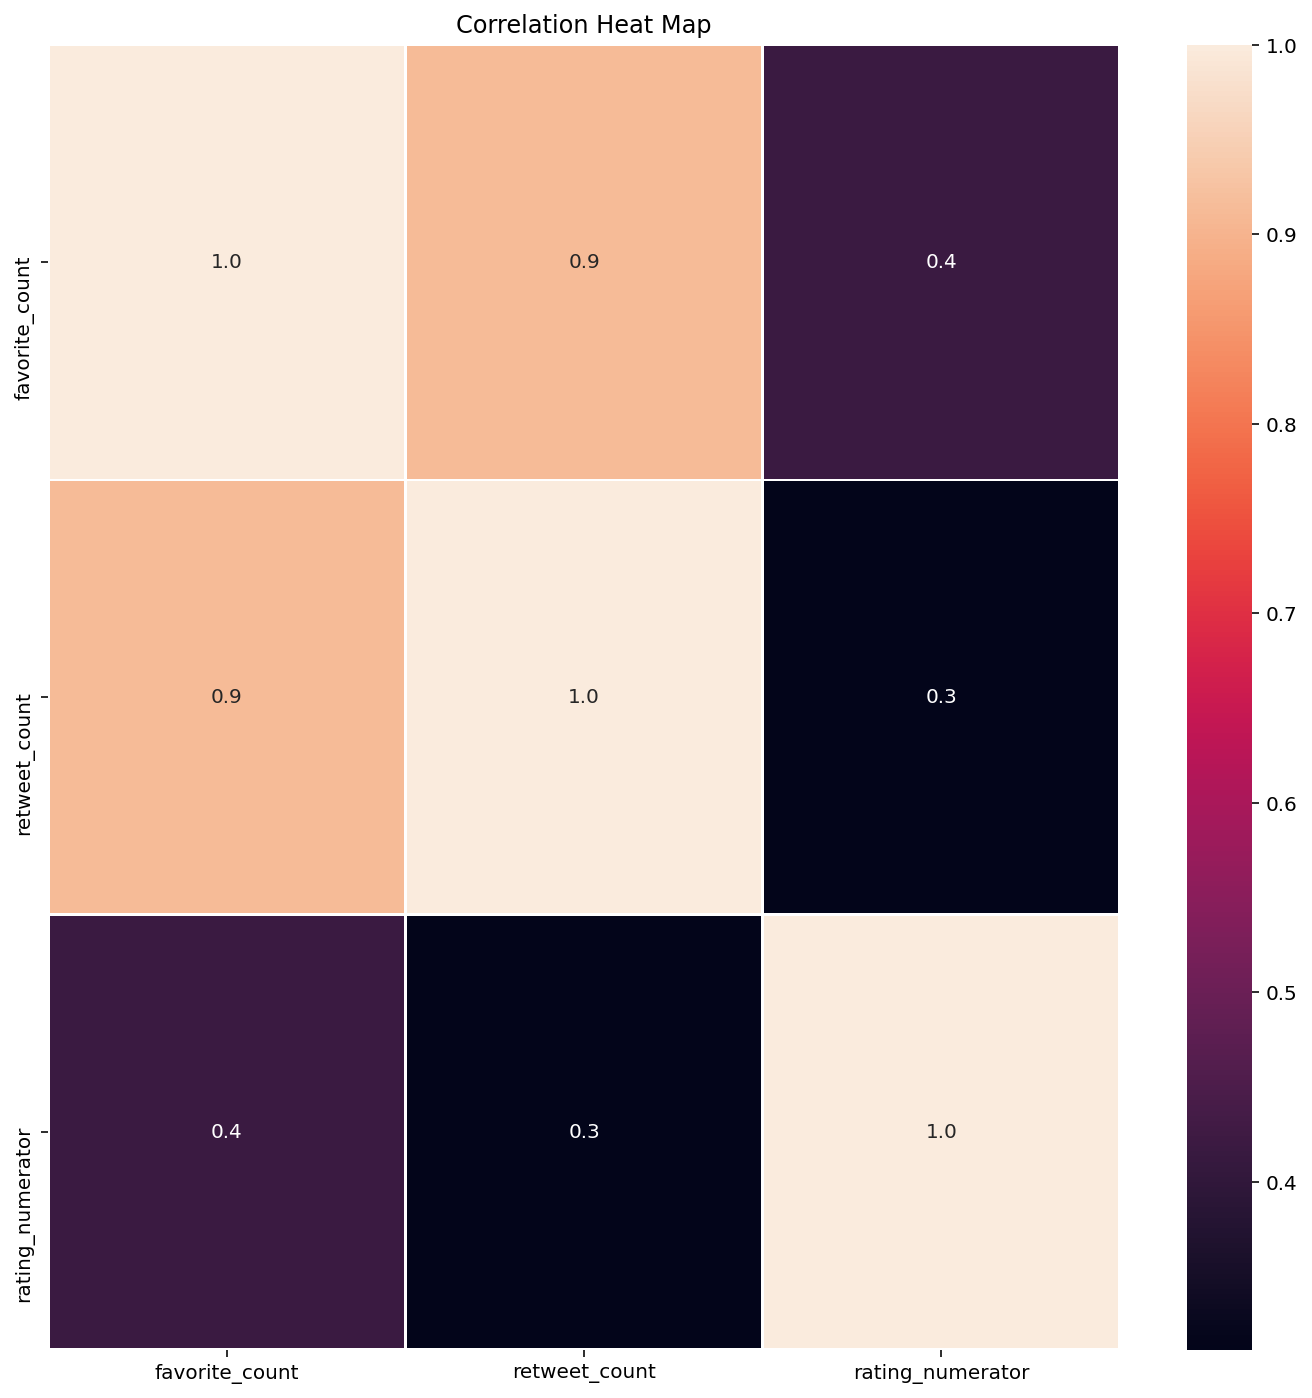

In [89]:
#put up a correlation map
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df_archive_clean[['source','favorite_count','retweet_count',
               'rating_numerator']].corr(), annot=True, linewidths=.8, fmt= '.1f',ax=ax)
plt.title('Correlation Heat Map')

### Analyses
- Strong correlation between favorites and retweets, this is expected.

### Visualization 2: Data partition on basis of Life stage of dogs

(-1.2888031215802502,
 1.2362512926690001,
 -1.2313090925730277,
 1.2106321619702247)

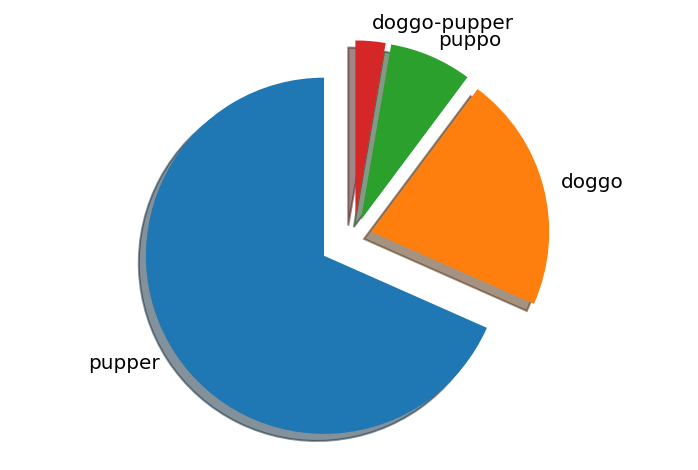

In [90]:
life_stage_count = list(df_archive_clean[df_archive_clean['dog_stage'] != 'None']['dog_stage'].value_counts())[0:4]
life_stages = df_archive_clean[df_archive_clean['dog_stage'] != 'None']['dog_stage'].value_counts().index.tolist()[0:4]
explode = (0.2, 0.1, 0.1, 0.1) 

figure1, axis1 = plt.subplots()
axis1.pie(life_stage_count, explode = explode, labels = life_stages, shadow = True, startangle = 90)
axis1.axis('equal')

### Analyses
- Dogs in the Pupper (early) stage of dog life cycle get most tweets, which is expected.

### Visualization 3: Scatter plot between favorites and retweets. 

Text(0.5, 1.0, 'Retweets and favorites Scatter plot')

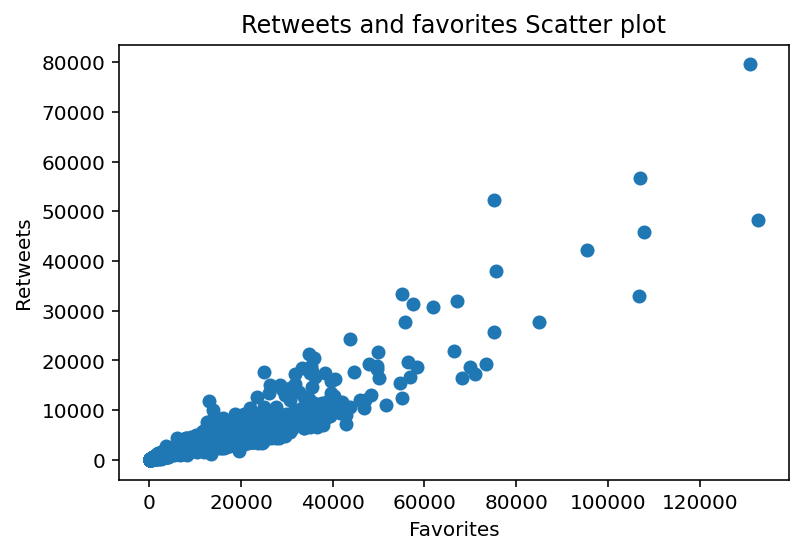

In [91]:
plt.scatter(df_archive_clean['favorite_count'], df_archive_clean['retweet_count'])
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and favorites Scatter plot')

### Analyses
- As expected there is a big positive correlation between the retweets and favorites.


## End of Notebook